In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve

import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
# import seaborn as sns
%matplotlib inline

In [83]:
pd.set_option('display.max_rows', None)
data = pd.read_excel('Data_Benchmark.xlsx',sheet_name='Strength Database', usecols = "A:L")
#Ultima fila NAN y penultima string

data = data.drop([67,68])
data

,Clay,Kaolinite Content,1d,STD,3D,STD.1,7D,STD.2,28D,STD.3,90D,STD.4
0,B45 Quartz B250,0,7.808750,0.251891,18.683750,0.328841,26.073438,0.696464,29.168750,0.541867,30.062500,0.872884
1,B45 India3 750°C,17.0337,9.403125,0.189520,21.560417,1.963092,29.157500,0.868001,37.515625,0.555407,40.345312,0.845567
2,B45 Brazil2,35,9.856250,0.306569,24.558750,0.830034,39.638750,0.894552,46.975000,0.501482,47.657813,1.878070
3,B45 Thailand 750°C,50.32,10.083750,0.133507,25.482500,0.695962,41.887500,1.548966,54.911250,2.384772,58.546250,1.679969
4,B45 Suriname1,66.2,12.016250,0.357853,32.342187,1.288414,45.941250,2.145351,55.303750,1.330976,58.403750,1.232285
5,B45 India1 750°C,79.3873,13.183750,0.566334,30.173750,0.726647,52.091250,1.006780,64.031250,4.819113,63.318750,1.785445
6,B45 Burgess,95,14.972396,0.509349,38.297500,2.049959,59.202083,0.140498,67.343750,2.014783,68.942188,3.905303
7,B45 Loma Sur,38.9255,10.081250,0.153793,23.618750,1.293184,38.528750,0.531298,49.446875,1.382842,51.429688,2.214808
8,B45 Suriname 2,66.2,13.837500,0.386524,33.832813,0.760934,49.710938,1.642893,57.896875,0.602199,60.131520,0.501962
9,India 2,51.26,9.854688,0.516205,23.387500,1.201139,39.750000,0.608383,54.789583,0.768936,60.350000,2.012739


In [67]:
data.shape

(67, 12)

Text(0, 0.5, 'Compressive Strenght')

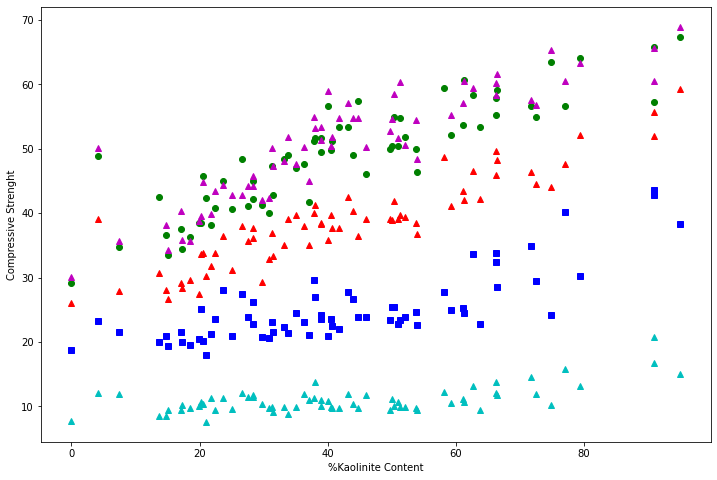

In [84]:
fig, ax = plt.subplots(figsize=(12, 8))
x= data["Kaolinite Content"]
y1 = data ["1d"]
y3 = data["3D"]
y7 = data["7D"]
y28 = data["28D"]
y90 = data["90D"]
plt.plot(x,y1,'c^',x,y3,'bs',x,y7,'r^',x,y28,'go', x,y90,'m^')
plt.xlabel('%Kaolinite Content')
plt.ylabel('Compressive Strenght')


VAMOS A IR CASO POR CASO

1D

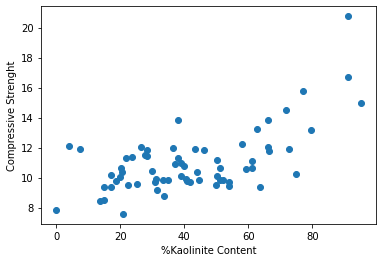

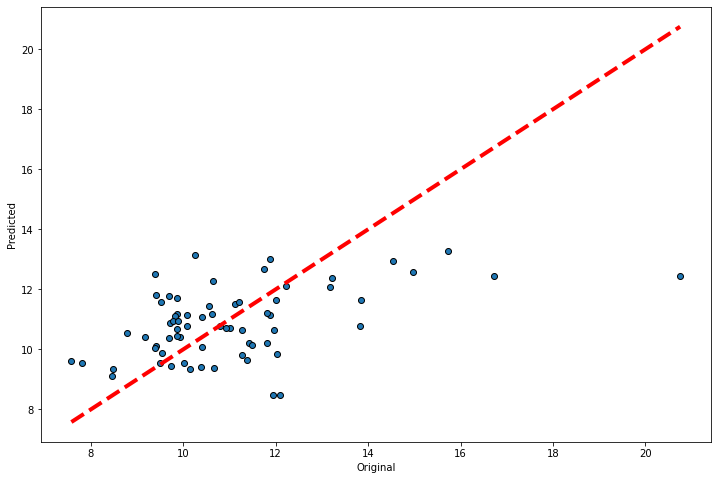

3.467255809539159

In [85]:
#Separar los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
feature_cols = ['Kaolinite Content']
X= data[feature_cols]
y1 = data ["1d"]
plt.scatter(X,y1)
plt.xlabel('%Kaolinite Content')
plt.ylabel('Compressive Strenght')
plt.show()

lr = LinearRegression()

predicted = cross_val_predict(lr, X, y1, cv=4)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y1, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y1), max(y1)], [min(y1), max(y1)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()
mean_squared_error(y1, predicted)


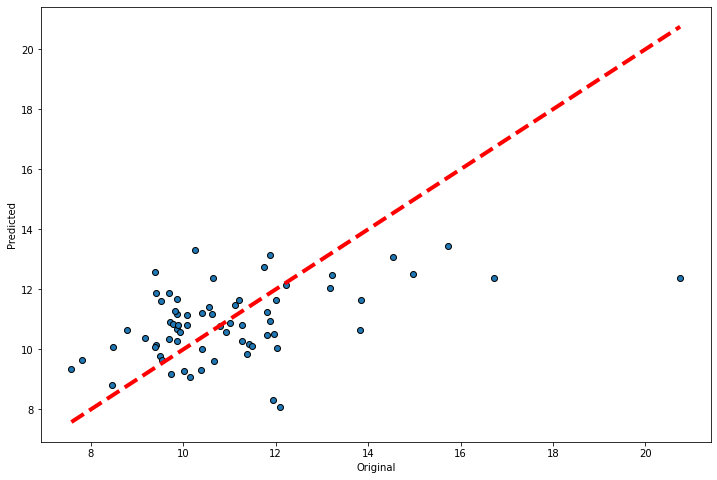

3.59295385636086

In [86]:
ridge = Ridge(alpha=3)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted_r = cross_val_predict(ridge, X, y1, cv=3)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y1, predicted_r, edgecolors=(0, 0, 0))
ax.plot([min(y1), max(y1)], [min(y1), max(y1)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()
mean_squared_error(y1, predicted_r)

90D

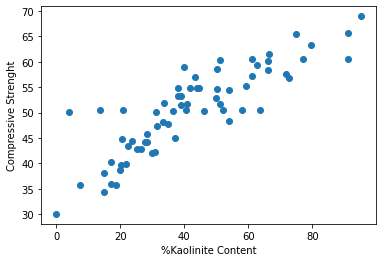

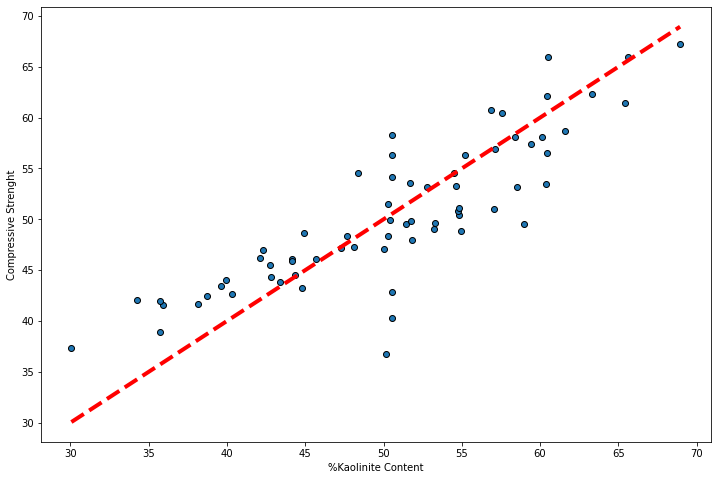

19.17745256020659

In [87]:
# QUE HACEMOS CON MISSING VALUES???? VOY A COMPLETARLOS POR LA MEDIA COMO PRIMER CRITERIO.
data = data.fillna(data.mean()) 
#Separar los datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split
feature_cols = ['Kaolinite Content']
X= data[feature_cols]
y90 = data["90D"]
plt.scatter(X,y90)
plt.xlabel('%Kaolinite Content')
plt.ylabel('Compressive Strenght')
plt.show()

lr = LinearRegression()

predicted = cross_val_predict(lr, X, y90, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y90, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y90), max(y90)], [min(y90), max(y90)], 'r--', lw=4)
plt.xlabel('%Kaolinite Content')
plt.ylabel('Compressive Strenght')
plt.show()
mean_squared_error(y90, predicted)


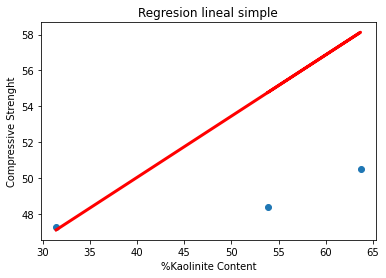


Datos del modelo regresion lineal simple:

Valor de la pendiente o coeficiente a
[0.34117955]
Valor de la interseccion o coeficiente b
36.39379060304944

Precision del modelo: 
0.761472957067821


In [88]:
#TUTORIAL YOUTUBE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y90,test_size=0.03) #30% como prueba
#Definicion algoritmo a utilizar
lr = LinearRegression()
#entrenar modelo 
lr.fit(X_train, y_train)
#Realizar prediccion
y_pred = lr.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('Regresion lineal simple')
plt.xlabel('%Kaolinite Content')
plt.ylabel('Compressive Strenght')
plt.show()
print()
print('Datos del modelo regresion lineal simple:')
print() 
print('Valor de la pendiente o coeficiente a')
print(lr.coef_)
print('Valor de la interseccion o coeficiente b')
print(lr.intercept_)
print() 
print('Precision del modelo: ')#R al cuadrado
print(lr.score(X_train,y_train))

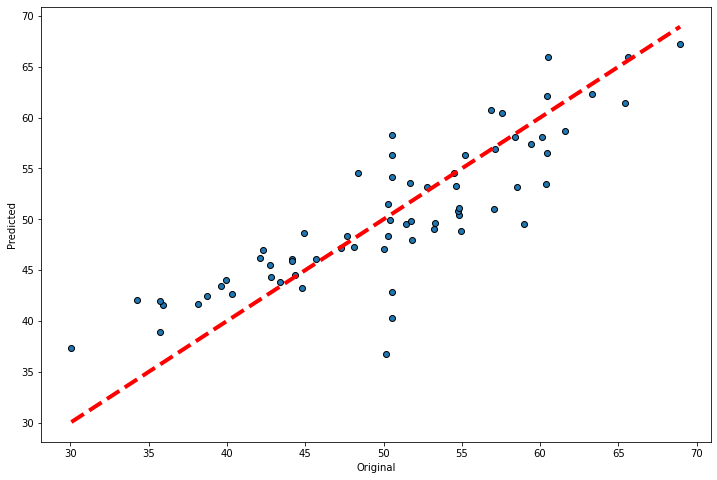

19.177810873724255

In [89]:
ridge = Ridge(alpha=5)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted_r = cross_val_predict(ridge, X, y90, cv=5)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y90, predicted_r, edgecolors=(0, 0, 0))
ax.plot([min(y90), max(y90)], [min(y90), max(y90)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()
mean_squared_error(y90, predicted_r)

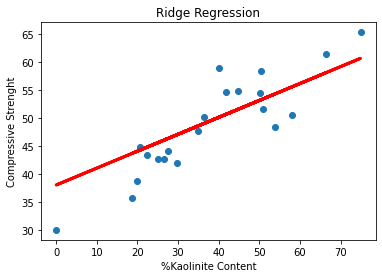


Datos del modelo ridge regression:

Valor de la pendiente o coeficiente a
[0.30232747]
Valor de la interseccion o coeficiente b
38.087517071909275

Precision del modelo: 
0.7346618418253907


In [90]:
#TUTORIAL YOUTUBE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y90,test_size=0.3) #30% como prueba
#Definicion algoritmo a utilizar
ridge = Ridge(alpha=5)
#entrenar modelo 
ridge.fit(X_train, y_train)
#Realizar prediccion
y_pred = ridge.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('Ridge Regression')
plt.xlabel('%Kaolinite Content')
plt.ylabel('Compressive Strenght')
plt.show()
print()
print('Datos del modelo ridge regression:')
print() 
print('Valor de la pendiente o coeficiente a')
print(ridge.coef_)
print('Valor de la interseccion o coeficiente b')
print(ridge.intercept_)
print() 
print('Precision del modelo: ')#R al cuadrado
print(ridge.score(X_train,y_train))

In [91]:
# Declares the model
mod = smf.ols(formula='y1 ~ x', data=data)
np.random.seed(2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     1.385
Date:                Tue, 10 Nov 2020   Prob (F-statistic):              0.458
Time:                        09:45:45   Log-Likelihood:                -30.975
No. Observations:                  67   AIC:                             189.9
Df Residuals:                       3   BIC:                             331.1
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [92]:
# Declares the model
mod = smf.ols(formula='y3 ~ x', data=data)
np.random.seed(2)
res = mod.fit()
#print(res.summary())

In [93]:
# Declares the model
mod = smf.ols(formula='y7 ~ x', data=data)
np.random.seed(2)
res = mod.fit()
#print(res.summary())

In [94]:
# Declares the model
mod = smf.ols(formula='y28 ~ x', data=data)
np.random.seed(2)
res = mod.fit()
#print(res.summary())

In [95]:
# Declares the model
mod = smf.ols(formula='y90 ~ x', data=data)
np.random.seed(2)
res = mod.fit()
#print(res.summary())

EXCEL 2 

In [96]:
data2 = pd.read_excel('Strength_Raw.xlsx', sheet_name='Hoja1', usecols = "A:PY")

data2['Strength']= ["1D","3D","7D","28D","90D"]
data2.set_index('Strength', inplace=True) 
data2 = data2.T
data2


Strength,1D,3D,7D,28D,90D
OPC,23.1,35.7812,41.325,52.575,51.6063
Unnamed: 2,22.1062,35.425,39.3875,51.9312,48.8875
Unnamed: 3,22.7375,34.0625,37.9625,48.575,49.9937
Unnamed: 4,25.1562,35.7188,39.6063,48.9625,50.0375
Unnamed: 5,24.925,35.9937,41.2062,50.175,49.7938
Unnamed: 6,24.4625,36.1625,42.7687,49.2812,52.2125
MK30,19.3938,35.7687,63.7,65.4625,77.15
Unnamed: 8,17.35,40.1625,63.025,72.3375,76.2188
Unnamed: 9,19.7375,36.8375,61.2375,74.575,70.8375
Unnamed: 10,17.4875,39.7437,62.9375,74.4188,68.8625


ValueError: x and y must have same first dimension, but have shapes (67,) and (440,)

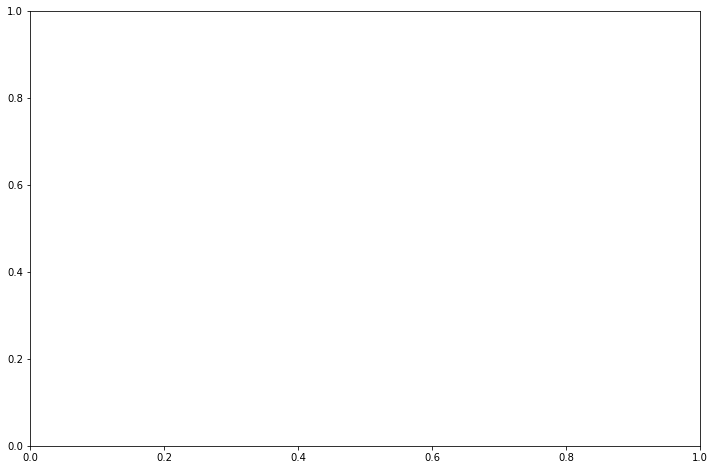

In [59]:
fig, ax = plt.subplots(figsize=(12, 8))
x= data["Kaolinite Content"]
y1 = data2["1D"]
y3 = data["3D"]
y7 = data["7D"]
y28 = data["28D"]
y90 = data["90D"]
plt.plot(x,y1,'c^',x,y3,'bs',x,y7,'r^',x,y28,'go', x,y90,'m^')
plt.xlabel('%Kaolinite Content')
plt.ylabel('Compressive Strenght')